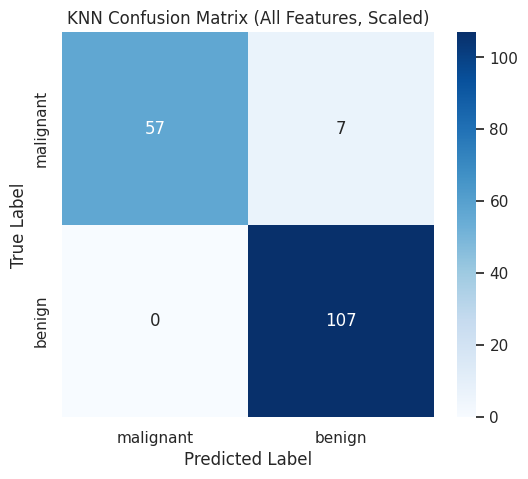

Classification Report:

              precision    recall  f1-score   support

   malignant       1.00      0.89      0.94        64
      benign       0.94      1.00      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


Prediction for the new input:
Benign


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

sns.set(style="whitegrid")

# -----------------------------
# Load dataset
# -----------------------------
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = breast_cancer.target  # 0 = malignant, 1 = benign

# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# -----------------------------
# Feature Scaling
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# Define and fit KNN model
# -----------------------------
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# -----------------------------
# Predictions on test data
# -----------------------------
y_pred = knn.predict(X_test_scaled)

# -----------------------------
# Confusion Matrix Heatmap
# -----------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=breast_cancer.target_names,
    yticklabels=breast_cancer.target_names
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("KNN Confusion Matrix (All Features, Scaled)")
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=breast_cancer.target_names))

# -----------------------------
# Predict for ONE new sample
# -----------------------------
# Example input: use one row from dataset
new_sample = X.iloc[49].values.reshape(1, -1)   # first patient in dataset
new_sample_scaled = scaler.transform(new_sample)

prediction = knn.predict(new_sample_scaled)[0]
print("\nPrediction for the new input:")
print("Malignant" if prediction == 0 else "Benign")
